<a href="https://colab.research.google.com/github/AnalystGagan/Project-inteliQC/blob/master/inteliQC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End to end machine-learning project for 🔎 quality control of ⚙️ mechanical component manufactured by casting process.

This notebook builds an End-to-end Binary Image Classifier using Tensorflow Hub.

## 1. Problem 
In the effort of replacing the manual visual inspection, we would like to automate this process with the help of AI solution.

Pass or Fail the component given an image of it.

## 2. Data 
The data we are using is from Kaggel - 
https://www.kaggle.com/ravirajsinh45/real-life-industrial-dataset-of-casting-product

## 3. Evaluation 
The evaluation is a prediction accuracy of model on test dataset 

## 4. Features
Some information about the data:

* we are dealing with images (unstructured data ) so it is probably best to use deep learning/ transfer learning. 
* There are two classes of data which is defective/ok part(Pass/Fail)  
* There are around ~6633 images in training dataset
* There are around ~715 images in test dataset






### Getting our workspace ready 

* Import TensorFlow 2.x ✔️
* Import TensorFlow Hub ✔️
* Make sure we are using a GPU ✔️


In [ ]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version :", tf.__version__)
print("TF Hub version:",hub.__version__)
 
# Check for GPU availablity 
print("GPU","available (Yessssssss!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version : 2.3.0
TF Hub version: 0.8.0
GPU available (Yessssssss!!!!)


## Getting our data ready (Turning into Tensors)

With all Machine Leanring models, our data has to be in numerical format. So that's what we will be doing first. Turning our images into Tensors(numerical representations)

Let's start by accessing our data and  creating the label data out of image names and save it in the form of .csv

In [ ]:
import numpy as np 
import pandas as pd 

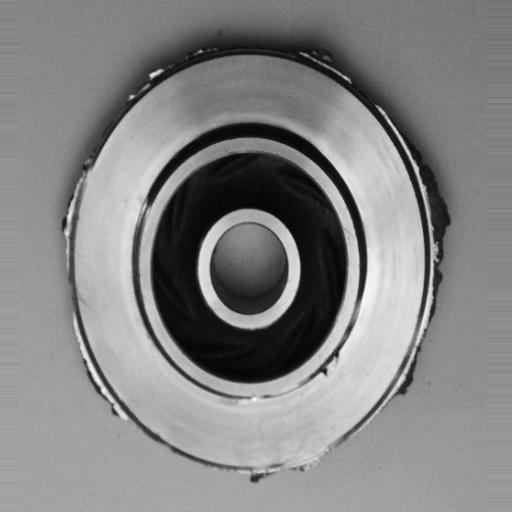

In [ ]:
from IPython.display import Image
Image("drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_512x512/casting_512x512/def_front/cast_def_0_0.jpeg")

In [ ]:
# import os
# path = "drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_512x512/casting_512x512/def_front/"
# filepath = [os.path.join(path, file)
#         for file in os.listdir(path)
#         if file.endswith('.jpeg')]

In [ ]:
# import os
# idname = []
# for i in filepath:
#   file = os.path.basename(i)
#   id = os.path.splitext(file)[0]
#   idname.append(id)
# idname[:5]


In [ ]:
# Create a function for label data

def label_data(path):
  """
  lebel_data function takes the file path object and convert it into idname object(filename of each image in file path object).
  """
  import os
  filepath = [os.path.join(path, file)
        for file in os.listdir(path)
        if file.endswith('.jpeg')]
  idname = []
  for i in filepath:
    file = os.path.basename(i)
    id = os.path.splitext(file)[0]
    idname.append(id)

  return idname
  

In [ ]:
# create array of defective part IDs
path = "drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_512x512/casting_512x512/def_front/"
notok = label_data(path)
notok[:5]

['cast_def_0_3279',
 'cast_def_0_7664',
 'cast_def_0_5273',
 'cast_def_0_6272',
 'cast_def_0_4908']

In [ ]:
# Create a Dataframe of defective parts 
df_notok = pd.DataFrame(notok, columns=["imageID"])
df_notok["QCcheck"] = 'defective'
df_notok.head()

,imageID,QCcheck
0,cast_def_0_3279,defective
1,cast_def_0_7664,defective
2,cast_def_0_5273,defective
3,cast_def_0_6272,defective
4,cast_def_0_4908,defective


In [ ]:
# create array of good part IDs
path = "drive/My Drive/Project intelli-qc/487456_1300891_bundle_archive/casting_512x512/casting_512x512/ok_front/"
ok = label_data(path)
ok[:5]

['cast_ok_0_9667',
 'cast_ok_0_694',
 'cast_ok_0_6890',
 'cast_ok_0_7120',
 'cast_ok_0_2967']

In [ ]:
# Create a Dataframe of defective parts 
df_ok = pd.DataFrame(ok, columns=["imageID"])
df_ok["QCcheck"] = 'ok'
df_ok.head()

,imageID,QCcheck
0,cast_ok_0_9667,ok
1,cast_ok_0_694,ok
2,cast_ok_0_6890,ok
3,cast_ok_0_7120,ok
4,cast_ok_0_2967,ok


In [ ]:
df_full_dataset = df_notok.append(df_ok)
df_full_dataset["QCcheck"].value_counts()

defective    781
ok           519
Name: QCcheck, dtype: int64

In [ ]:
# shuffle rows in dataset
df_shuf = df_full_dataset.sample(frac=1).reset_index(drop=True)
df_shuf

,imageID,QCcheck
0,cast_def_0_5435,defective
1,cast_ok_0_9732,ok
2,cast_def_0_3631,defective
3,cast_def_0_4394,defective
4,cast_ok_0_423,ok
...,...,...
1295,cast_def_0_1432,defective
1296,cast_def_0_5978,defective
1297,cast_def_0_3855,defective
1298,cast_def_0_6247,defective


In [ ]:
# Save label data as .csv
# df_shuf.to_csv(r'drive/My Drive/Project intelli-qc/label.csv', index = False)

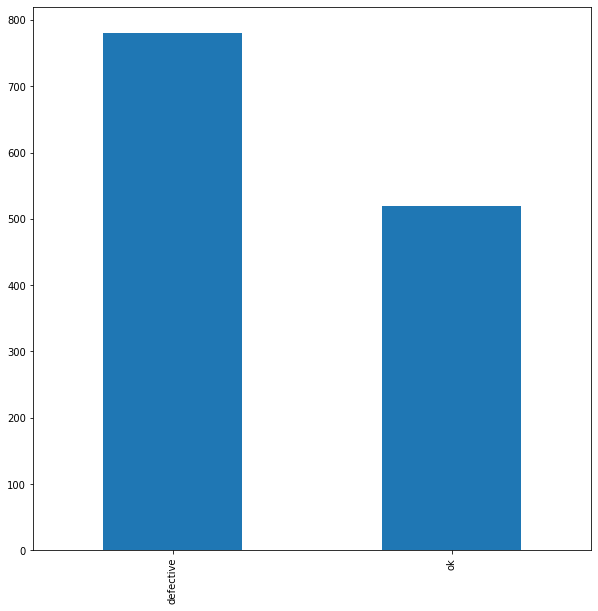

In [ ]:
df_shuf['QCcheck'].value_counts().plot.bar(figsize=(10,10));